In [1]:
import numpy as np
from IPython.display import display, Math

from lib.pde_find import PDEFind
from lib.utils.plot_1D import plot_2d, plot_3d

<Figure size 640x480 with 0 Axes>

In [2]:
data = np.load("data/1.npz")

u = data["u"]
x = data["x"]
t = data["t"]

In [3]:
pdefind = PDEFind(
    var_labels=(["x", "t"], ["u"]),
    polynomial_degree=2,
    order=3,
)

In [4]:
grid = pdefind.add_grid(x, t)

In [5]:
library, labels = pdefind.create_library(u)

display(Math(r"\\".join(labels)))

<IPython.core.display.Math object>

In [6]:
u_t = np.gradient(u, t[0], axis=1)

In [7]:
coeffs, alpha = pdefind.solve_regression(library, u_t, algorithm="tlsq", verbose=True, num_term_limit=range(1, 10))

Solving using tlsq regression
Library size: (15, 256, 101), Target size: 25856
Trying max_terms=1


TLSQ Iterations:  16%|█▌        | 8/50 [00:00<00:00, 264.70it/s, #nzz_terms=1, cutoff=0.01]


Error: 4.419155889533927
Trying max_terms=2


TLSQ Iterations:   6%|▌         | 3/50 [00:00<00:00, 341.80it/s, #nzz_terms=2, cutoff=0.01]


Error: 0.3103074064932392
Trying max_terms=3


TLSQ Iterations:   6%|▌         | 3/50 [00:00<00:00, 212.53it/s, #nzz_terms=2, cutoff=0.01]


Error: 0.3103074064932392
Trying max_terms=4


TLSQ Iterations:   6%|▌         | 3/50 [00:00<00:01, 32.43it/s, #nzz_terms=2, cutoff=0.01]


Error: 0.3103074064932392
Trying max_terms=5


TLSQ Iterations:   6%|▌         | 3/50 [00:00<00:00, 290.81it/s, #nzz_terms=2, cutoff=0.01]

Error: 0.3103074064932392
Trying max_terms=6



TLSQ Iterations:   6%|▌         | 3/50 [00:00<00:00, 222.32it/s, #nzz_terms=2, cutoff=0.01]


Error: 0.3103074064932392
Trying max_terms=7


TLSQ Iterations:   6%|▌         | 3/50 [00:00<00:00, 287.58it/s, #nzz_terms=2, cutoff=0.01]


Error: 0.3103074064932392
Trying max_terms=8


TLSQ Iterations:   6%|▌         | 3/50 [00:00<00:00, 114.12it/s, #nzz_terms=2, cutoff=0.01]


Error: 0.3103074064932392
Trying max_terms=9


TLSQ Iterations:   6%|▌         | 3/50 [00:00<00:00, 305.52it/s, #nzz_terms=2, cutoff=0.01]

Error: 0.3103074064932392
Minimum error at 2 terms
# of non-zero terms: 2


In [8]:
display(Math(pdefind.latex_string(coeffs, labels, "u")))

<IPython.core.display.Math object>

In [9]:
initial_condition = [u[:, 0]]
coefficients = [coeffs]

u_pred = pdefind.solve(initial_condition, coefficients, labels)

0
The solver successfully reached the end of the integration interval.


In [10]:
l2_err_u = np.linalg.norm(u - u_pred) / np.linalg.norm(u)

print(f"L2 error for u: {l2_err_u:.3e}")

l2_err_u = np.linalg.norm(u[..., -1] - u_pred[..., -1]) / np.linalg.norm(u[..., -1])

print(f"L2 error (final_t) for u: {l2_err_u:.3e}")

L2 error for u: 5.304e-03
L2 error (final_t) for u: 6.686e-03


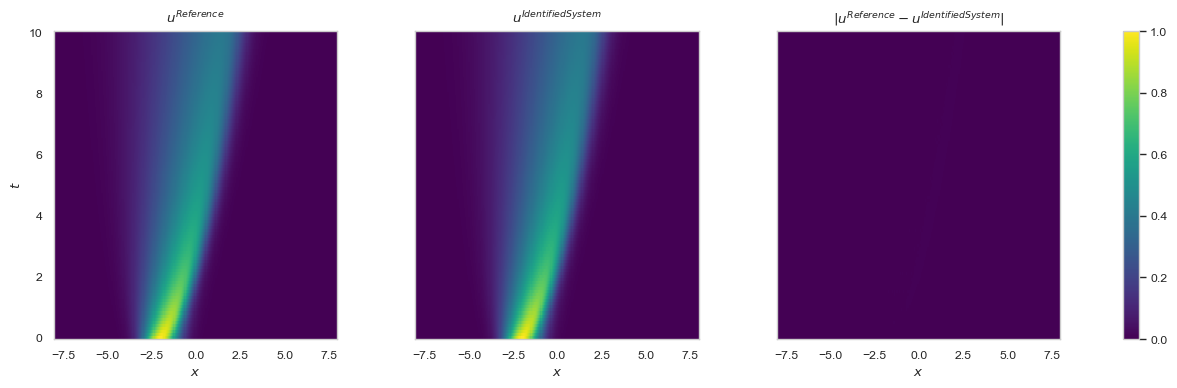

In [11]:
ref_sol = np.stack([x, t, u], axis=-1)
sol_plot = sol_plot = np.expand_dims(u_pred, axis=2)

plot_2d(sol_plot, ref_sol, "figures/pde1_2d.png")

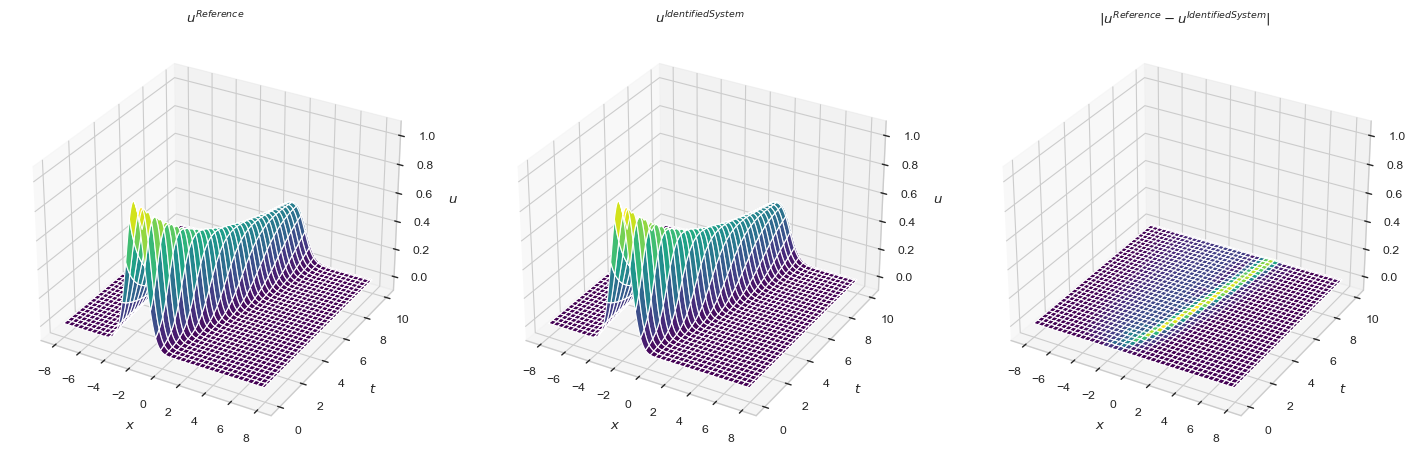

In [12]:
plot_3d(sol_plot, ref_sol, "figures/pde1_3d.png")